<a href="https://colab.research.google.com/github/sagargohel95/CE888-7-sp/blob/main/Labs/Lab%204/recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.set_printoptions(precision=3)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/jester-data-1.csv', prefix=0, header=None)
df.index = [x for x in range(1, len(df.values)+1)]
df = df.replace(99, np.NaN)

In [ ]:
df.drop([0], axis=1, inplace=True)
df.columns = [i for i in range(1, 101)]

In [ ]:
df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
1,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.42,NaN,NaN,NaN,-7.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
2,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,7.91,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.00,2.77,8.30,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
3,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,NaN,8.25,NaN,NaN,7.48,7.28,7.28,8.93,NaN,6.17,7.28,NaN,NaN,8.98,7.33,NaN,6.17,9.08,7.33,...,6.46,7.28,NaN,NaN,7.04,7.28,NaN,7.28,8.25,NaN,NaN,NaN,NaN,NaN,NaN,8.93,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.03,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,NaN,NaN,NaN,NaN,2.91,3.93,6.75,6.60,NaN,6.65,-6.12,NaN,7.57,6.21,6.65,NaN,-8.30,7.18,2.82,...,0.00,-3.69,NaN,NaN,7.82,0.24,NaN,7.28,-2.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63,NaN,NaN,-2.33,NaN,NaN,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
5,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,2.48,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,NaN,NaN,NaN,NaN,NaN,NaN,4.13,NaN,NaN,NaN,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24979,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,7.23,-0.53,5.63,-7.14,-4.08,-3.50,-8.20,-3.98,-9.22,-0.15,-6.46,5.63,-0.92,-2.91,-4.17,2.82,3.40,8.64,6.84,6.80,-0.87,7.38,-3.50,8.88,7.43,5.39,2.23,-0.68,3.40,-0.58,4.42,...,8.59,3.45,0.87,9.27,-4.66,5.73,-0.49,8.35,1.94,5.00,-9.66,8.98,8.98,-9.81,9.13,9.08,9.08,3.98,0.73,9.03,8.98,9.22,8.93,9.13,9.27,-1.99,-9.95,-9.90,9.13,8.83,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24980,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,4.90,8.88,-8.69,-7.48,-8.83,-1.75,6.60,3.54,1.50,7.67,-0.44,9.22,8.74,9.03,9.08,8.93,3.74,3.20,-9.17,-8.98,8.79,-7.67,-3.06,9.13,8.40,-0.63,-7.18,0.58,8.88,9.27,8.50,...,2.77,8.11,-7.96,8.93,-0.87,-5.87,8.88,-1.12,-8.74,8.74,NaN,NaN,NaN,NaN,NaN,4.90,NaN,NaN,NaN,NaN,-0.29,0.92,-0.78,0.15,-0.10,0.00,-0.19,-0.87,-1.36,-0.58,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24981,NaN,NaN,NaN,NaN,-7.77,NaN,6.70,-6.75,NaN,NaN,NaN,NaN,-6.46,-1.65,-6.80,-6.41,-6.99,7.23,6.75,-6.99,6.55,NaN,NaN,NaN,NaN,0.49,-0.53,-6.94,-0.49,NaN,6.46,-0.53,NaN,NaN,-7.86,-0.34,NaN,-6.94,NaN,NaN,...,0.49,-0.24,NaN,NaN,-3.11,-6.65,NaN,-0.58,6.31,NaN,NaN,-7.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24982,NaN,NaN,NaN,NaN,-9.71,NaN,4.56,-8.30,NaN,NaN,NaN,NaN,-9.47,NaN,3.45,-0.92,-4.51,-4.13,-5.73,-9.51,2.82,NaN,NaN,NaN,NaN,-0.49,2.91,2.62,8.30,NaN,3.06,5.44,NaN,NaN,-0.68,2.04,NaN,NaN,1.

## Jokes Ratings Distribution

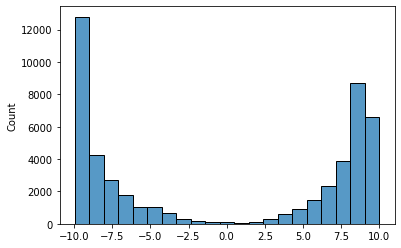

In [ ]:
sns.histplot(data=df.min(axis=1).append(df.max(axis=1)))

## Validation Set

In [ ]:
arr = df.to_numpy()

In [ ]:
rated = np.where(arr != np.NaN)
print(len(rated[0]), rated[1].shape)

2498300 (2498300,)


In [ ]:
def replace(orig, percentage=0.1):
        """
        Replaces 'percentage'% of the original values in 'orig' with 99's
        :param orig: original data array
        :param percentage: percentage of values to replace (0<percentage<1)
        """
        new_data = orig.copy()
        rated = np.where(arr != np.NaN)
        n_rated = len(rated[0])
        idx = np.random.choice(n_rated, size=int(percentage*n_rated), replace=False)
        new_data[rated[0][idx], rated[1][idx]] = np.NaN
        return new_data, (rated[0][idx], rated[1][idx])

In [ ]:
val_arr, idx = replace(arr, 0.1)

In [ ]:
arr[idx[0][0], idx[1][0]]

6.94

In [ ]:
val_arr[idx[0][0], idx[1][0]]

nan

In [ ]:
val_arr.shape

(24983, 100)

## Latent Factor Modelling

In [ ]:
n_latent_factors = 2

# Initialise as random values
latent_user_preferences = np.random.random((val_arr.shape[0], n_latent_factors))
latent_item_features = np.random.random((val_arr.shape[1], n_latent_factors))

In [ ]:
latent_item_features

array([[0.651, 0.845],
       [0.792, 0.905],
       [0.498, 0.407],
       [0.227, 0.587],
       [0.708, 0.388],
       [0.43 , 0.417],
       [0.421, 0.983],
       [0.453, 0.228],
       [0.583, 0.869],
       [0.359, 0.138],
       [0.863, 0.973],
       [0.224, 0.118],
       [0.874, 0.037],
       [0.133, 0.495],
       [0.706, 0.322],
       [0.892, 0.209],
       [0.227, 0.696],
       [0.338, 0.029],
       [0.406, 0.059],
       [0.005, 0.829],
       [0.445, 0.967],
       [0.262, 0.629],
       [0.354, 0.333],
       [0.56 , 0.737],
       [0.28 , 0.384],
       [0.129, 0.001],
       [0.851, 0.745],
       [0.533, 0.254],
       [0.397, 0.309],
       [0.762, 0.557],
       [0.744, 0.912],
       [0.776, 0.769],
       [0.382, 0.298],
       [0.853, 0.879],
       [0.461, 0.112],
       [0.587, 0.172],
       [0.834, 0.188],
       [0.111, 0.857],
       [0.158, 0.631],
       [0.543, 0.328],
       [0.635, 0.757],
       [0.616, 0.689],
       [0.759, 0.67 ],
       [0.0

In [ ]:
latent_user_preferences

array([[0.873, 0.848],
       [0.933, 0.847],
       [0.707, 0.333],
       ...,
       [0.041, 0.779],
       [0.634, 0.089],
       [0.549, 0.22 ]])

In [ ]:
def predict_rating(user_id, item_id):
        """ Predict a rating given a user_id and an item_id.
        """
        user_preference = latent_user_preferences[user_id]
        item_preference = latent_item_features[item_id]
        return user_preference.dot(item_preference)


def train(user_id, item_id, rating, alpha=0.0001):
        #print(item_id)
        predicted_rating = predict_rating(user_id, item_id)
        err = predicted_rating - rating
        #print(err)
        user_pref_values = latent_user_preferences[user_id]
        latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
        latent_item_features[item_id] -= alpha * err * user_pref_values
        return err


def sgd(iterations):
        """ Iterate over all users and all items and train for 
            a certain number of iterations
        """
        mse_history = []
        for iteration in range(iterations):
            error = []
            for user_id in range(latent_user_preferences.shape[0]):
                for item_id in range(latent_item_features.shape[0]):
                    rating = val_arr[user_id, item_id]
                    if not np.isnan(rating):
                        err = train(user_id, item_id, rating)
                        error.append(err)
            mse = (np.array(error) ** 2).mean()   
            if (iteration % 2) == 0:
                print('Iteration %d/%d:\tMSE=%.6f' % (iteration, iterations, mse))
                mse_history.append(mse)
        return mse_history

Iteration 0/10:	MSE=26.174916
Iteration 2/10:	MSE=24.953311
Iteration 4/10:	MSE=24.522583
Iteration 6/10:	MSE=24.093096
Iteration 8/10:	MSE=23.658569


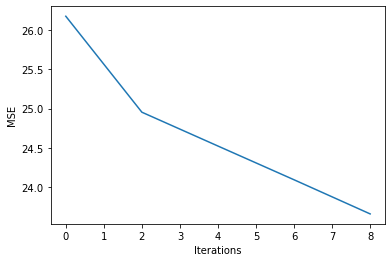

In [ ]:
num_iter = 10
hist = sgd(num_iter)  # Note how the MSE decreases with the number of iterations
plt.figure()
plt.plot(np.arange(0, num_iter, 2), hist)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

## Predictions

In [ ]:
predictions = latent_user_preferences.dot(latent_item_features.T)
predictions

array([[1.636, 1.052, 1.028, ..., 1.949, 0.797, 2.623],
       [1.592, 1.023, 0.999, ..., 1.893, 0.777, 2.553],
       [1.778, 1.125, 1.102, ..., 2.046, 0.88 , 2.865],
       ...,
       [0.716, 0.504, 0.483, ..., 1.023, 0.317, 1.109],
       [0.755, 0.456, 0.451, ..., 0.784, 0.389, 1.236],
       [1.323, 0.835, 0.819, ..., 1.517, 0.656, 2.134]])

In [ ]:
values = [zip(val_arr[i], predictions[i]) for i in range(predictions.shape[0])]
comparison_data = pd.DataFrame(values)
comparison_data.columns = df.columns

In [ ]:
comparison_data

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,"(-7.82, 1.636144269183922)","(8.79, 1.052243570250208)","(-9.66, 1.0275237439769718)","(-8.16, -1.1030808449361351)","(-7.52, 1.109461892985713)","(-8.5, 2.8461564211909836)","(-9.85, -0.044476178882530915)","(4.17, -0.5477852235874341)","(nan, -0.1404250145501877)","(-4.76, 2.099723417930214)","(-8.5, 3.0595904687883104)","(nan, 2.8340137975003388)","(-7.18, -1.9114374706720476)","(nan, 2.8181074588245485)","(-7.18, -1.971238965309229)","(-7.52, -3.7593967114598548)","(-7.43, -0.9471646773723548)","(-9.81, -0.49232865483901006)","(-9.85, 0.7677402302012377)","(-9.85, -0.5916284092975809)","(-9.37, 3.6249532716742974)","(1.5, 1.9054039785596573)","(-4.37, 0.8128471496185136)","(-9.81, -1.5608126519375987)","(-8.5, 1.3218925037411358)","(1.12, 2.638920617488968)","(7.82, 4.7976071049689955)","(2.86, 2.7637846453406762)","(9.13, 4.51739585158611)","(-7.43, 0.3175055792563698)","(2.14, 3.7013462872907232)","(-4.08, 4.754926746737983)","(-9.08, -0.9422406952945553)","(7.82, 2.0736488962328514)","(5.05, 4.613979747370023)","(4.95, 4.860795481376323)","(-9.17, -1.1223186253957427)","(-8.4, 2.2976708816592177)","(-8.4, 2.3701901989399583)","(-8.4, 2.1704119386990506)",...,"(8.59, 4.054872769810446)","(nan, 4.568581986665706)","(-6.84, 1.1573840671462916)","(nan, -0.2501409847377375)","(2.82, 3.842766856354071)","(-1.36, 4.049008955079552)","(-9.08, -0.4654373510991054)","(8.3, 4.179984721881737)","(5.68, 4.15107119046268)","(-4.81, 1.4539950861843653)","(nan, -0.15594010098034053)","(nan, 4.248861418792339)","(nan, 2.240821670363259)","(nan, -1.106510723467459)","(nan, 0.42522225683554254)","(nan, 3.849706448409606)","(nan, 1.7036632817075996)","(-9.42, 3.001030769085128)","(nan, 1.0578189578115291)","(nan, 2.457775622672912)","(nan, 3.0232825530156817)","(-7.72, 1.8572143620979105)","(nan, 3.422225822506281)","(nan, 1.720265536931592)","(nan, 1.991192162666535)","(nan, 0.9576212856557272)","(nan, 3.0893234336333877)","(nan, 3.2745837692471285)","(nan, 5.049636271361571)","(nan, 1.5842203692690142)","(2.82, 3.1957890680588146)","(nan, 2.285183509568374)","(nan, 3.857479020084819)","(nan, 2.033473657966841)","(nan, 1.940711204856566)","(nan, 2.560490314351928)","(-5.63, 2.716198987194351)","(nan, 1.9491237705760351)","(nan, 0.7972747682730602)","(nan, 2.6227388044830717)"
1,"(nan, 1.592299279933531)","(-0.29, 1.022933234999412)","(6.36, 0.9991290796927287)","(4.37, -1.0780899637903385)","(nan, 1.0821050806059997)","(-9.66, 2.7692525265560564)","(-0.73, -0.04075028793527907)","(-5.34, -0.5309459584261174)","(8.88, -0.1380675661034988)","(9.22, 2.0450592540538977)","(6.75, 2.977059163202482)","(8.64, 2.7592417435924217)","(nan, -1.8591022925027267)","(7.43, 2.74032119350858)","(nan, -1.9174035911083402)","(-0.97, -3.658580631921568)","(4.66, -0.9239884680249751)","(-0.68, -0.4783848726895307)","(3.3, 0.7509181582582821)","(-1.21, -0.5775690444091618)","(0.87, 3.5251501902687066)","(8.64, 1.852591392526753)","(8.35, 0.7902930903069673)","(9.17, -1.5230103267501551)","(0.05, 1.283509515059501)","(7.57, 2.5684101849718495)","(4.71, 4.6745791779677734)","(0.87, 2.689435294554014)","(-0.39, 4.399230405731988)","(6.99, 0.3071828642263233)","(6.5, 3.602190495373177)","(-0.92, 4.6292181090137)","(7.14, -0.9172772069838295)","(9.03, 2.016860977084979)","(-1.8, 4.493086589983295)","(nan, 4.735217879746709)","(7.09, -1.0920686124636356)","(3.4, 2.237300433880192)","(-0.87, 2.30471764058929)","(7.91, 2.112054099456674)",...,"(-6.7, 3.9488904625721006)","(-3.35, 4.449412107293079)","(-9.03, 1.1291099740185633)","(4.47, -0.24535588204833847)","(4.08, 3.74128249079383)","(nan, 3.9417827489017205)","(8.74, -0.45574505704632695)","(1.12, 4.070839463805286)","(0.78, 4.040634637592182)","(7.52, 1.4157002813044521)","(-5

## Quiz

In [ ]:
df.mean().idxmin()

58

In [ ]:
df.mean().idxmax()

50

In [ ]:
df.loc[:, 58].mean()

-3.8338796373689923

In [ ]:
df.iloc[11517, 68]

8.2

In [ ]:
df_excel_items = pd.read_excel('https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/movies_latent_factors.xlsx')
df_excel_users = pd.read_excel('https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/movies_latent_factors.xlsx', sheet_name='Users')

In [ ]:
df_excel_items.head(2)

,Movie ID,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
0,11,Star Wars: Episode IV - A New Hope (1977),-1.521848,-1.038507,2.027269,0.247933,-0.594548,2.513260,-1.848910,0.476710,-0.224146,-0.760681,-0.973915,0.862379,0.403861,1.129616,-0.248806
1,12,Finding Nemo (2003),-0.342185,-0.296586,-0.385962,2.443297,-1.097015,-0.619465,0.572887,0.329516,-0.712228,0.323554,-0.561948,-0.142405,-0.564415,0.506876,1.274993


In [ ]:
df_excel_users.head()

,User,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
0,4768,-0.204024,0.161079,-0.090447,0.138495,-0.162934,0.163894,0.051502,-0.088582,0.126829,0.065967,0.085008,0.355404,0.007108,-0.118663,-0.039125
1,156,-0.189652,-0.178979,-0.091490,-0.000823,-0.032646,0.177209,-0.098123,-0.068283,-0.011575,0.120866,-0.009931,-0.048606,0.045916,0.113671,0.179873
2,5323,-0.115308,-0.090886,-0.053129,0.018472,-0.068081,-0.004828,0.113005,0.102107,0.034758,0.000693,-0.073712,-0.019460,0.108372,0.054471,-0.109552
3,174,-0.227462,-0.272532,-0.017231,0.054324,0.214755,-0.072639,-0.033122,-0.086508,-0.131479,0.180403,0.095890,-0.082396,0.036767,-0.165438,0.050692
4,4529,-0.014616,-0.102218,-0.107935,0.155784,-0.123362,-0.118228,-0.013549,-0.050622,0.058698,-0.159600,-0.142382,-0.132836,-0.039897,0.129063,0.102669


In [ ]:
index = df_excel_users['User'][df_excel_users['User'] == 2665].index
df_excel_users.loc[index, ['User', 'Factor12']]

,User,Factor12
23,2665,0.086562


In [ ]:
factor = 'Factor8'
highest_loading = df_excel_items.loc[:, factor].max()
index = df_excel_items[factor][df_excel_items[factor] == highest_loading].index
df_excel_items.loc[index, ['Title', factor]]

,Title,Factor8
5,Kill Bill: Vol. 1 (2003),4.630243


In [ ]:
df_excel_items['Factor11'].idxmin()

43

In [ ]:
print(df_excel_users.shape, (df_excel_items.drop(['Title'], axis=1)).T.shape)

(25, 16) (16, 100)


In [ ]:
latent_user_preferences = df_excel_users.drop(['User'], axis=1).to_numpy() #dropping id
latent_item_features = df_excel_items.drop(['Movie ID', 'Title'], axis=1).T.to_numpy() #dropping id and transposing it for multiplication

In [ ]:
a = latent_user_preferences.dot(latent_item_features)

In [ ]:
a.shape

(25, 100)

In [ ]:
movie_df = pd.DataFrame(a)
movie_df.columns = df_excel_items['Movie ID'].values

In [ ]:
movie_df.set_index(df_excel_users['User'].values, inplace=True)

In [ ]:
round(movie_df.loc[2092, 1597], 2)

0.06

In [ ]:
round(movie_df.loc[2665, 424], 2)

0.18

In [ ]:
movie_df

,11,12,13,14,22,24,38,63,77,85,98,105,107,114,120,121,122,134,141,146,153,155,161,180,187,194,197,238,243,268,272,274,275,278,280,329,393,414,424,453,...,745,752,786,788,807,808,809,812,854,857,862,954,955,1422,1572,1597,1637,1891,1892,1894,1900,2024,2164,2501,2502,3049,4327,5503,7443,8358,8467,8587,9331,9741,9802,9806,10020,36657,36658,36955
4768,0.389174,0.191449,0.766364,-0.190918,-0.610322,-0.388917,-0.004002,0.190730,0.268826,1.188110,0.195472,1.075866,0.490713,-0.514578,-0.370327,-0.506850,-0.416795,0.263785,0.069576,-0.461273,-0.168938,0.248981,-0.088369,-0.320207,-0.171628,0.058226,0.287472,0.634223,0.216470,-0.269254,-0.023449,0.532674,0.471114,0.937787,0.414122,0.243899,-0.465304,-1.140411,0.593612,0.080442,...,0.366176,-0.402584,0.050475,0.149423,0.541162,0.661988,0.055876,-0.112212,-0.039461,0.450075,0.525795,-0.361932,-1.052730,0.378917,0.237825,0.309767,-0.154147,0.416629,0.304657,-1.417385,0.061697,-0.266492,-0.079663,0.543639,0.341835,0.129791,-1.246529,0.567501,-0.031013,0.077461,0.526472,-0.053100,0.116875,-0.167823,0.207883,0.248880,-0.264199,-0.395129,-0.522412,0.097010
156,0.883069,0.319496,0.396485,-0.380979,-0.187145,-0.862520,-0.119464,-0.044719,0.082417,0.345774,0.658106,0.510767,-0.125068,-0.151969,0.517930,0.472757,0.561092,-0.221019,-0.129598,-0.208213,-0.225939,0.702483,0.189687,0.337877,-0.260572,-0.292796,0.404124,-0.049005,-0.129483,-0.550813,0.336472,-0.119816,-0.242805,0.293419,0.268176,0.577851,-0.884860,-1.023764,0.199863,0.514953,...,0.304296,0.409391,-0.229632,-0.136578,-0.101327,-0.106959,-0.488648,-0.003041,-0.561891,0.251416,0.269787,0.052700,-0.328004,0.046813,0.016504,-0.218339,-0.111493,0.910234,0.885208,0.409308,-0.218698,0.033565,0.277388,0.277319,0.220398,-0.637950,-1.423655,0.097996,-0.354999,0.122281,-0.500473,0.357837,-0.041433,-0.072079,0.048516,0.062227,-0.179019,-0.259385,-0.455462,-0.113381
5323,0.214068,0.154537,0.261073,-0.187174,0.502264,0.447514,-0.258614,-0.293113,-0.104059,0.073767,0.543291,0.045008,-0.059968,-0.036395,0.247560,0.237873,0.285821,-0.316820,-0.344919,-0.128238,-0.466908,0.759871,0.265635,-0.257978,-0.153931,-0.233692,0.360666,0.694714,-0.386115,0.027994,0.428741,0.192190,-0.259231,0.478752,0.327803,0.136766,0.372406,-0.399539,0.271648,0.181640,...,-0.086112,-0.018083,-0.393651,-0.302412,-0.066160,0.209991,0.010296,0.322565,-0.111107,0.228516,0.266962,0.169295,-0.032999,0.283415,0.106452,-0.271994,-0.156425,0.186516,0.101966,-0.421808,-0.256815,-0.018047,-0.302059,0.132926,0.080893,-0.199164,-0.413831,-0.097153,-0.334807,-0.106210,-0.517215,0.667856,-0.217218,-0.390654,-0.111029,0.046301,0.242631,-0.083633,-0.163929,-0.199840
174,-0.139366,0.129855,1.212876,-0.411287,0.484533,-0.865355,-0.162480,-0.028759,-0.096787,-0.187731,0.770433,-0.075722,-0.052166,-0.353584,1.858963,1.892477,1.891704,-0.352995,-0.238122,-0.155691,-0.465392,0.315802,-0.063346,0.164196,0.000219,-0.147500,0.776647,0.060033,-0.237285,-0.605052,-0.105234,0.085034,-0.552006,0.668020,-0.359605,-0.101019,-0.760042,-0.412730,0.558233,0.995228,...,0.468163,0.700335,-0.304751,-0.097778,0.158311,0.559324,0.103477,-0.223986,-0.366725,0.303603,-0.074221,-0.587257,-0.648043,-0.069623,-0.264658,-0.382602,-0.414798,-0.091951,-0.054668,0.499982,-0.226226,0.233677,0.175190,-0.197097,-0.192601,-1.233248,-1.337438,-0.163425,-0.334595,0.352293,-1.370533,0.271769,-0.125226,0.050462,0.132708,-0.197997,-0.307370,0.138995,0.003095,-0.524709
4529,-0.038172,0.866052,-0.285316,0.016812,-0.249510,-0.702938,0.144358,-0.233250,0.253279,-0.146575,0.146374,-0.211549,-0.511296,0.149259,-0.215623,-0.246139,-0.158675,-0.085058,-0.153884,0.230182,0.171180,0.817499,0.003485,-0.007810,-0.564633,0.095389,-0.266832,0.163397,-0.165875,-0.066653,0.722882,-0.110033,0.047110,0.069928,-0.051499,0.511015,-0.674589,-0.460420,-0.017807,0.089402,...,0.039535,-0.003985,-0.054086,-0.236235,-0.297127,-0.120728,-0.136538,0.495312,-0.586712,0.165301,0.768090,0.179368,0.173325,0.011385,-0.365406,-0.311510,-0.133716,0.060928,-0.106457,-0.

In [ ]:
movie_df.loc[5338].sort_values(ascending=False)

604      0.424038
2502     0.392447
2501     0.389644
597      0.330325
393      0.314764
           ...   
105     -0.327231
9802    -0.340844
36955   -0.381373
1572    -0.390364
607     -0.454890
Name: 5338, Length: 100, dtype: float64

In [ ]:
movie_df.loc[1882].sort_values(ascending=False)

604      0.769912
603      0.725877
597      0.609041
155      0.453408
550      0.401888
           ...   
36955   -0.445656
197     -0.478864
788     -0.506743
9802    -0.511003
8467    -0.647339
Name: 1882, Length: 100, dtype: float64